# EDA

The idea of this first exploratory data analysis is to do the minimum amount of work
necessary to create a, probably underwhelming, but working model.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

import plotly.express as px

In [2]:
data = pd.read_csv('../data/bank-additional-full.csv', sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Target Variable

* target variable has two classes: no == `don't subscribe ` and yes == `subscribe`.
* huge class imbalance ~0.2% fraud cases

In [4]:
data['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In binary classification tasks the target are usually denoted with 0 and 1.

In [5]:
data['y'] = data['y'].map({'no': 0, 'yes': 1})

## NA's

One must at least check if any of the fields contain NA data, which is not the case here.

In [6]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Categorial vairables

Without going into the details of the categorial variables, we must at least check the number of different classes per categorical variable. In the case one of them has a very high count of different classes, this needs to be handled by manually grouping the more seldom classes togther.

Luckely, that is not the case here.

In [7]:
cat_cols = data.dtypes[data.dtypes == 'object'].index

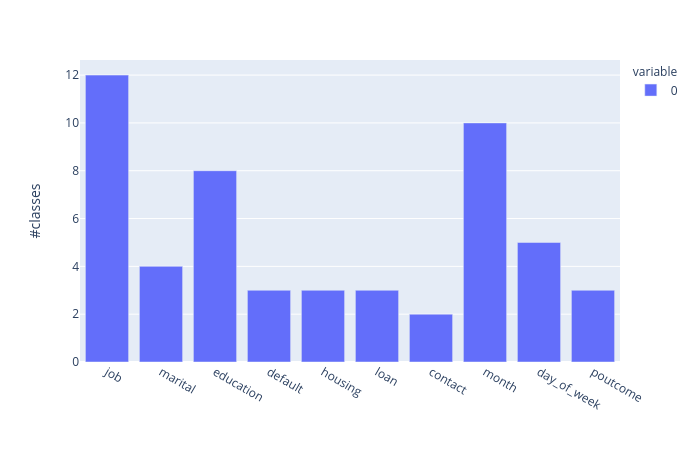

In [8]:
px.bar(data[cat_cols].nunique(), labels={'index': '', 'value': '#classes'}).show("png")

In [9]:
for col in cat_cols:
    print(col)
    display(data[col].value_counts())

job


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

marital


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

education


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

default


no         32588
unknown     8597
yes            3
Name: default, dtype: int64

housing


yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

loan


no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

contact


cellular     26144
telephone    15044
Name: contact, dtype: int64

month


may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

day_of_week


thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

poutcome


nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64